# Twin4Build: Parameter Estimation Example

Welcome to this tutorial on using the Twin4Build package! In this notebook, you'll learn how to:
1. Setup the environment

Let's get started!

## 1. Setup
First, let's install and import the necessary packages:

In [1]:
# %pip install git+https://github.com/JBjoernskov/Twin4Build.git # Uncomment in google colab
import sys
sys.path.append(r"C:\Users\jabj\Documents\python\Twin4Build")
import twin4build as tb
import datetime
from dateutil import tz
import twin4build.utils.plot.plot as plot

## 2. Creating the Model

In this example, we will use the one_room_example_model.xlsm file. 
This file contains a model of a single room with a space heater and supply and return ventilation.
We use the translation engine to automatically create the components and connections.

In [2]:
import twin4build.examples.utils as utils
# Create a new model
model = tb.Model(id="mymodel")
filename = utils.get_path(["parameter_estimation_example", "one_room_example_model.xlsm"])
model.load(semantic_model_filename=filename)

import matplotlib.pyplot as plt
import os
sem_graph = model._semantic_model.get_dir(folder_list=["graphs"], filename="semantic_model.png")[0]
print(sem_graph)
sim_graph = model._simulation_model.get_dir(folder_list=["graphs"], filename="simulation_model.png")[0]
print(sim_graph)
# image = plt.imread(system_graph)
# plt.figure(figsize=(12,12))
# plt.imshow(image)
# plt.axis('off')
# plt.show()


C:\Users\jabj\Documents\python\Twin4Build\twin4build\examples

Loading model...
   |___Parsing semantic model...[OK]
   |___Drawing semantic model...[OK]
   |___Applying translator...[OK]
   |___Drawing simulation model...
Loading model...[OK]
   |___Removing cycles...[OK]
   |___Determining execution order...[OK]
   |___Loading parameters...[OK]
   |___Validating model...[WARNING]
   |   |
   |   |___|CLASS: DamperSystem|ID: 020B_room_supply_damper|: Missing values for the following parameter(s) to enable use of Simulator, Evaluator, and Monitor:
   |   |   |
   |   |   |___a
   |   |
   |   |___|CLASS: BuildingSpace0AdjBoundaryOutdoorFMUSystem|ID: [020B][020B_space_heater]|: Missing values for the following parameter(s) to enable use of Simulator, Evaluator, and Monitor:
   |   |   |
   |   |   |___C_supply
   |   |   |___C_wall
   |   |   |___C_air
   |   |   |___C_boundary
   |   |   |___R_out
   |   |   |___R_in
   |   |   |___R_boundary
   |   |   |___f_wall
   |   |   |___f_air


From the model validation above we see that different types of information is missing. 
As we are focusing on parameter estimation in this example, we will add the missing information that is relevant to this task.
Here, the "[020B][020B_space_heater]" component is missing an input "supplyWaterTemperature".
In addition, some filenames are missing for the sensors and some of the schedules need to be defined.
Let's add the missing information and validate again.


In [3]:
import twin4build.systems as systems
def fcn(self):
    supply_water_schedule = systems.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 60,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_start_hour": [],
        "ruleset_end_hour": [],
        "ruleset_value": []
    },
    id="supply_water_schedule"
    )




    self.add_connection(supply_water_schedule, self.components["[020B][020B_space_heater]"], "scheduleValue", "supplyWaterTemperature") # Add missing input
    self.components["020B_temperature_sensor"].filename = utils.get_path(["parameter_estimation_example", "temperature_sensor.csv"])
    self.components["020B_co2_sensor"].filename = utils.get_path(["parameter_estimation_example", "co2_sensor.csv"])
    self.components["020B_valve_position_sensor"].filename = utils.get_path(["parameter_estimation_example", "valve_position_sensor.csv"])
    self.components["020B_damper_position_sensor"].filename = utils.get_path(["parameter_estimation_example", "damper_position_sensor.csv"])
    self.components["BTA004"].filename = utils.get_path(["parameter_estimation_example", "supply_air_temperature.csv"])
    self.components["020B_co2_setpoint"].weekDayRulesetDict = {"ruleset_default_value": 900,
                                                                    "ruleset_start_minute": [],
                                                                    "ruleset_end_minute": [],
                                                                    "ruleset_start_hour": [],
                                                                    "ruleset_end_hour": [],
                                                                    "ruleset_value": []}
    self.components["020B_occupancy_profile"].weekDayRulesetDict = {"ruleset_default_value": 0,
                                                                    "ruleset_start_minute": [],
                                                                    "ruleset_end_minute": [],
                                                                    "ruleset_start_hour": [],
                                                                    "ruleset_end_hour": [],
                                                                    "ruleset_value": []}
    self.components["020B_temperature_heating_setpoint"].useFile = True
    self.components["020B_temperature_heating_setpoint"].filename = utils.get_path(["parameter_estimation_example", "temperature_heating_setpoint.csv"])
    self.components["outdoor_environment"].filename = utils.get_path(["parameter_estimation_example", "outdoor_environment.csv"])


model.load(semantic_model_filename=filename, fcn=fcn, verbose=False)


Loading model...
   |___Parsing semantic model...[OK]
   |___Drawing semantic model...[OK]
   |___Applying translator...[OK]
   |___Drawing simulation model...
Loading model...[OK]
   |___Applying user defined function...C:\Users\jabj\Documents\python\Twin4Build\twin4build\examples
C:\Users\jabj\Documents\python\Twin4Build\twin4build\examples
C:\Users\jabj\Documents\python\Twin4Build\twin4build\examples
C:\Users\jabj\Documents\python\Twin4Build\twin4build\examples
C:\Users\jabj\Documents\python\Twin4Build\twin4build\examples
C:\Users\jabj\Documents\python\Twin4Build\twin4build\examples
C:\Users\jabj\Documents\python\Twin4Build\twin4build\examples
[OK]
   |___Removing cycles...[OK]
   |___Determining execution order...[OK]
   |___Loading parameters...[OK]
   |___Validating model...[WARNING]
   |   |
   |   |___|CLASS: DamperSystem|ID: 020B_room_supply_damper|: Missing values for the following parameter(s) to enable use of Simulator, Evaluator, and Monitor:
   |   |   |
   |   |   |___a

As shown above, the validation of the model for Estimation now passes.

### Visualizing the Model (not required)
We can visualize the model to see the components and connections.<br>
This is not required, but it can be helpful for debugging and for building the model.<br>
The nodes in the graph represent components, and the edges represent connections between components as defined earlier.

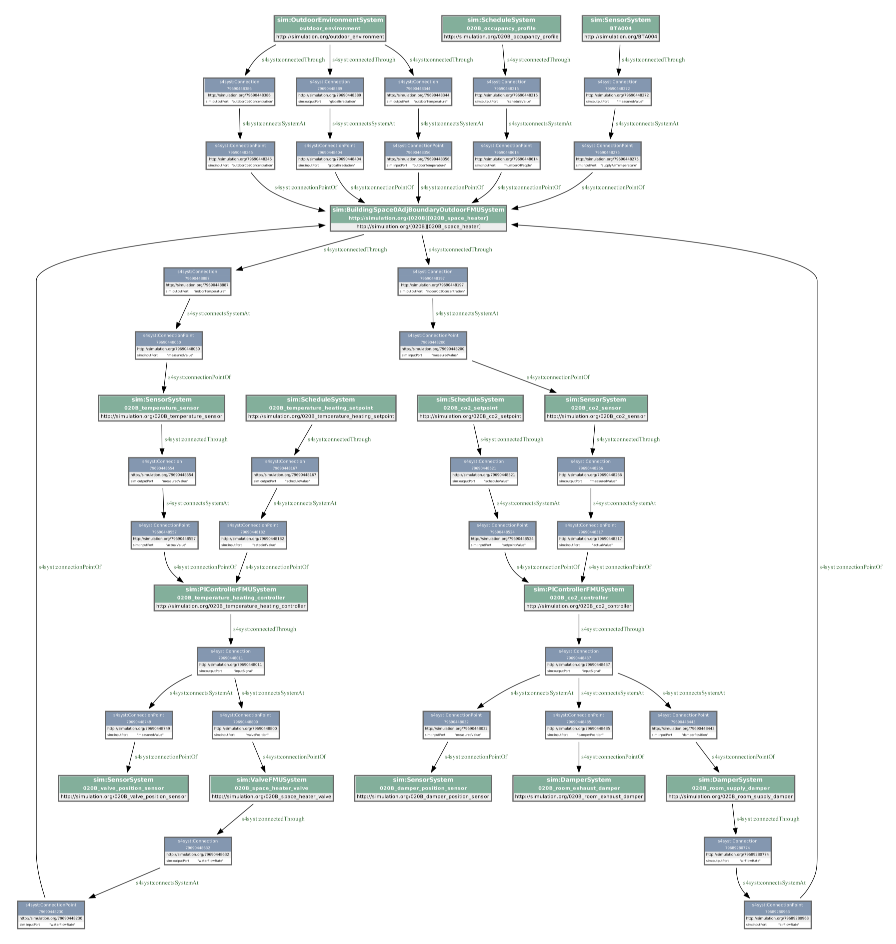

In [4]:
import matplotlib.pyplot as plt
import os
sim_graph = model._simulation_model.get_dir(folder_list=["simulation_model", "semantic_model", "graphs"], filename="semantic_model.png")[0]
image = plt.imread(sim_graph)
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.axis('off')
plt.show()

## 3. Setting up parameter estimation

Now that our model is set up, let's set up the parameter estimation.
We will use the LS estimation method (least squares) to estimate the parameters.
The LS estimation method is a data-driven method that finds the parameters that minimize the error between the simulation results and the measurement results.




In [5]:
from dateutil.tz import gettz 
stepSize = 600  # Seconds
startTime = datetime.datetime(year=2023, month=11, day=27, hour=0, minute=0, second=0,
                                tzinfo=gettz("Europe/Copenhagen"))
endTime = datetime.datetime(year=2023, month=12, day=7, hour=0, minute=0, second=0,
                            tzinfo=gettz("Europe/Copenhagen"))
space = model.components["[020B][020B_space_heater]"]
heating_controller = model.components["020B_temperature_heating_controller"]
co2_controller = model.components["020B_co2_controller"]
space_heater_valve = model.components["020B_space_heater_valve"]
supply_damper = model.components["020B_room_supply_damper"]
exhaust_damper = model.components["020B_room_exhaust_damper"]

space.CO2_start = 400
space.fraRad_sh = 0.35
space.T_a_nominal_sh = 333.15
space.T_b_nominal_sh = 303.15
space.TAir_nominal_sh = 293.15
space.airVolume = 125.82


targetParameters = {"private": {"C_wall": {"components": [space], "x0": 1.7e+6, "lb": 1e+6, "ub": 2e+6}, #1.5e+6
                                "C_air": {"components": [space], "x0": 1.7e+6, "lb": 1e+4, "ub": 2e+6}, #3e+6
                                "C_boundary": {"components": [space], "x0": 2e+4, "lb": 1e+4, "ub": 2e+5}, #1e+5
                                "R_out": {"components": [space], "x0": 0.014, "lb": 1e-3, "ub": 0.5}, #0.2
                                "R_in": {"components": [space], "x0": 0.024, "lb": 1e-3, "ub": 0.5}, #0.2
                                "R_boundary": {"components": [space], "x0": 0.001, "lb": 9.9e-4, "ub": 0.3}, #0.005
                                "f_wall": {"components": [space], "x0": 0.5, "lb": 0, "ub": 2}, #1
                                "f_air": {"components": [space], "x0": 0.5, "lb": 0, "ub": 2}, #1
                                "kp": {"components": [heating_controller, co2_controller], "x0": 1e-3, "lb": 1e-6, "ub": 3}, #1e-3
                                "Ti": {"components": [heating_controller, co2_controller], "x0": 5, "lb": 1e-5, "ub": 10}, #3
                                "m_flow_nominal": {"components": [space_heater_valve], "x0": 0.0202, "lb": 1e-3, "ub": 0.5}, #0.0202
                                "dpFixed_nominal": {"components": [space_heater_valve], "x0": 1, "lb": 0, "ub": 10000}, #2000
                                "T_boundary": {"components": [space], "x0": 21, "lb": 19, "ub": 24}, #20
                                "a": {"components": [supply_damper, exhaust_damper], "x0": 5, "lb": 0.5, "ub": 8}, #2
                                "infiltration": {"components": [space], "x0": 0.001, "lb": 1e-4, "ub": 0.3}, #0.001
                                "Q_occ_gain": {"components": [space], "x0": 50, "lb": 10, "ub": 1000}, #100,
                                "C_supply": {"components": [space], "x0": 400, "lb": 100, "ub": 600}, #400
                                "Q_flow_nominal_sh": {"components": [space], "x0": 500, "lb": 10, "ub": 1000}, #100,
                                "n_sh": {"components": [space], "x0": 1.24, "lb": 1, "ub": 2}, #1
                                "CO2_occ_gain": {"components": [space], "x0": 8.18e-6, "lb": 1e-8, "ub": 1e-4}, #100,
                                }}


percentile = 2
targetMeasuringDevices = {model.components["020B_valve_position_sensor"]: {"standardDeviation": 0.01/percentile, "scale_factor": 1},
                            model.components["020B_temperature_sensor"]: {"standardDeviation": 0.1/percentile, "scale_factor": 20},
                            model.components["020B_co2_sensor"]: {"standardDeviation": 10/percentile, "scale_factor": 400},
                            model.components["020B_damper_position_sensor"]: {"standardDeviation": 0.01/percentile, "scale_factor": 1},
                            }

# Options for the estimation method. If the options argument is not supplied or None is supplied, default options are applied.
options = {"ftol": 1e-10,
            "xtol": 1e-8, # 1e-12
            "verbose": 2}
estimator = tb.Estimator(model)
estimator.estimate(targetParameters=targetParameters,
                    targetMeasuringDevices=targetMeasuringDevices,
                    startTime=startTime,
                    endTime=endTime,
                    stepSize=stepSize,
                    n_initialization_steps=288,
                    method="LS", #Use Least Squares instead
                    options=options)
model.load_estimation_result(estimator.result_savedir_pickle)

print("SOLUTION")
print("C_wall: ", space.C_wall)
print("C_air: ", space.C_air)
print("C_boundary: ", space.C_boundary)
print("R_out: ", space.R_out)
print("R_in: ", space.R_in)
print("R_boundary: ", space.R_boundary)
print("f_wall: ", space.f_wall)
print("f_air: ", space.f_air)
print("Q_occ_gain: ", space.Q_occ_gain)
print("kp: ", heating_controller.kp)
print("Ti: ", heating_controller.Ti)
print("kp: ", co2_controller.kp)
print("Ti: ", co2_controller.Ti)
print("m_flow_nominal: ", space_heater_valve.m_flow_nominal)
print("dpFixed_nominal: ", space_heater_valve.dpFixed_nominal)
print("T_boundary: ", space.T_boundary)
print("a: ", supply_damper.a)
print("a: ", exhaust_damper.a)
print("infiltration: ", space.infiltration)
print("CO2_occ_gain: ", space.CO2_occ_gain)
print("Q_flow_nominal_sh: ", space.Q_flow_nominal_sh)
print("n_sh: ", space.n_sh)
print("C_supply: ", space.C_supply)






   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1163e+06                                    1.63e+06    
       1              2         6.9023e+05      4.26e+05       8.56e-03       5.03e+06    
`xtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.1163e+06, final cost 6.9023e+05, first-order optimality 5.03e+06.
SOLUTION
C_wall:  1700000.0000193007
C_air:  1700000.000001115
C_boundary:  19999.99999973128
R_out:  0.012615642477619982
R_in:  0.02141887438071408
R_boundary:  0.000993818089225116
f_wall:  0.49996028161075445
f_air:  0.4998641650780394
Q_occ_gain:  50.0
kp:  0.00044011123972649373
Ti:  5.000558618074231
kp:  0.001
Ti:  5.0
m_flow_nominal:  0.016410660270868196
dpFixed_nominal:  0.9999802764176737
T_boundary:  20.99296561750433
a:  5.0
a:  5.0
infiltration:  0.0008763711060927852
CO2_occ_gain:  8.18e-06
Q_flow_nominal_sh:  499.99995626023184
n_sh:  1.2396326279526901
C_

## Visualizing the Results

Finally, let's visualize the results of our simulation.

In [6]:
monitor = tb.Monitor(model) #Compares the simulation results with the measured results
monitor.monitor(startTime=startTime,
                endTime=endTime,
                stepSize=stepSize,
                show=True)

100%|██████████| 1440/1440 [00:00<00:00, 2534.76it/s]


Exception: Not yet implemented for 

## Conclusion

Congratulations! You've successfully created a simple Twin4Build model, simulated it, and visualized the results. 

In this tutorial, you learned how to:
1. Create a model and add components (schedule and damper)
2. Connect components in the model
3. Set up and run a simulation
4. Visualize the simulation results

Next steps:
- Try adding more components to create more complex models
- Experiment with different schedules and parameter values
- Explore other visualization options in the `plot` module

For more advanced usage and detailed documentation, please refer to the Twin4Build documentation.